<a href="https://colab.research.google.com/github/hunghehe2205/AIO-Exercise/blob/feature%2FModule4-Exercise/Module4/M04W03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# aivietnam.ai - advertising
import numpy as np
# from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]
  ones_column = np.ones((features_X.shape[0], 1))
  features_X = np.hstack((ones_column, features_X))


  return features_X, sales_Y

In [2]:
#question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [3]:
#question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [17]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):
  individual = [generate_random_value(bound) for _ in range(n)]
  return individual

individual = create_individual()
print(individual)

[-3.5303859926650247, -4.012366553408523, -4.262575663712749, 3.5047382625925483]


In [26]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):

    loss = compute_loss(individual)
    fitness = 1/(loss + 1)

    return fitness

In [27]:
#question 4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [28]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()


    length = len(individual1)
    for i in range(length):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]


    return individual1_new, individual2_new

In [29]:
#question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [30]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    length = len(individual)
    for i in range(length):
      if random.random() < mutation_rate:
        individual_m[i] = generate_random_value()
    return individual_m

In [31]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [32]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [46]:
population = initializePopulation(100)
print(population)

[[0.609232490007795, 3.74851753764975, -2.9545903588702105, -0.18435081568179412], [3.623967783671765, 1.3768081852094727, 1.8391630996938335, 2.365222738814393], [-1.6132166397230552, -4.961862651174495, -3.158078341215631, 0.003261268714723764], [-1.5584047250881239, 4.604391901629079, -1.6215515265498026, 2.807723691392084], [0.7797899805794684, 2.5363862842590956, 2.6391477645539307, -2.787835237565972], [-3.082593566943469, -2.667361998142357, 3.1077413149021127, -1.503091769270829], [-3.1623889522160864, 0.8962490164307946, 1.0908443004111246, 3.211399810091109], [3.6517949235490077, 4.901704732510202, 4.103877401460176, 3.2675643505102734], [2.5247367370426255, -3.4538977343185207, 2.3135873194075094, 3.1147992150710646], [2.2882266867849554, -2.5402642951146515, -4.904686778645573, 2.625037533481047], [-1.549202856903682, 4.825334926871809, -0.18200544864370172, 0.10901568841039211], [-0.9515685726972778, -4.72709599913731, -2.9594120738217935, 1.165935983450983], [0.6513710457

In [34]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [35]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[-2.019718912469891, -1.4543588396492835, -2.5194149878016745, 1.3277899749022748]


In [36]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
         # **************** your code here ****************
        individual1 = selection(sorted_population, m)
        individual2 = selection(sorted_population, m)

        # crossover
        # **************** your code here ****************
        individual1, individual2 = crossover(individual1, individual2)

        # mutation

        # **************** your code here ****************
        individual1 = mutate(individual1)
        individual2 = mutate(individual2)

        # add to new population
        new_population.append(individual1)
        new_population.append(individual2)

        # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m - elitism:]:
        new_population.append(ind)


    return new_population, compute_loss(sorted_population[m-1])

In [37]:
#Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)


Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [43]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):

    # *********** your code here ************
    population, losses = create_new_population(population, elitism=2, gen=i)
    losses_list.append(losses)

  return losses_list, population


In [45]:
losses_list, population = run_GA()

Best loss: 658.6693664002165 with chromsome:  [4.766543337972103, -0.00732302924258188, -1.0541207579701428, 1.1715690467763706]
Best loss: 247.1197740827661 with chromsome:  [0.18492405174775017, 0.19036984974114546, 0.2716574983621012, -0.48603444207199087]
Best loss: 232.61749069049205 with chromsome:  [-1.9033705652623, 0.19036984974114546, 0.2716574983621012, -0.48603444207199087]
Best loss: 232.61749069049205 with chromsome:  [-1.9033705652623, 0.19036984974114546, 0.2716574983621012, -0.48603444207199087]
Best loss: 226.7406325587914 with chromsome:  [-4.1937862000935535, 0.19036984974114546, 0.2716574983621012, -0.48603444207199087]
Best loss: 27.720955529335715 with chromsome:  [2.454850738512331, 0.022385539187061987, 0.3721341967215708, 0.04101491281734981]
Best loss: 27.720955529335715 with chromsome:  [2.454850738512331, 0.022385539187061987, 0.3721341967215708, 0.04101491281734981]
Best loss: 27.720955529335715 with chromsome:  [2.454850738512331, 0.022385539187061987, 0.

Best loss: 2339.0439460798593 with chromsome:  [-1.9832711320982677, -0.021511302578282043, -0.19418341945753537, 1.7949440210593526]
Best loss: 1756.112003216303 with chromsome:  [-2.5357166892976677, 0.21044874359100185, -2.3100493353652993, 0.6022287406475546]
Best loss: 1170.2276450150152 with chromsome:  [-0.8458512631012682, 0.18202553137592004, 0.4967056800219394, 0.2728585871062761]
Best loss: 732.4770507759562 with chromsome:  [0.5627477032979777, 0.14227356400356328, 0.45865706131070993, -1.0488777755641965]
Best loss: 228.24392172907417 with chromsome:  [-1.9832711320982677, -0.021511302578282043, -0.19418341945753537, 0.5925976222435647]
Best loss: 228.24392172907417 with chromsome:  [-1.9832711320982677, -0.021511302578282043, -0.19418341945753537, 0.5925976222435647]
Best loss: 228.24392172907417 with chromsome:  [-1.9832711320982677, -0.021511302578282043, -0.19418341945753537, 0.5925976222435647]
Best loss: 195.322984903575 with chromsome:  [1.2682958995895344, -0.02151

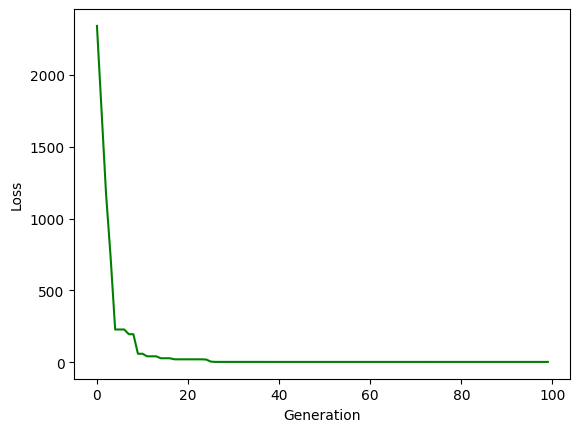

In [48]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):

      # *********** your code here *************
    plt.plot(losses_list,c='green')
    plt.xlabel("Generation")
    plt.ylabel("Loss")
    plt.show()


losses_list,population = run_GA()
visualize_loss(losses_list)